In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install mne
!pip install pybv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 19.4 MB/s eta 0:00:00


In [ ]:

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import math
import mne
import pybv
%matplotlib inline

In [ ]:
raw = mne.io.read_raw_brainvision('/content/drive/MyDrive/BCI/BCICompetition/data/Train_set/pybv_train_file_p300.vhdr', preload=True)
# Imprimir información sobre Raw
#Ruta felipe: '/content/drive/MyDrive/P300_PYTHON/drive-download-20230826T021221Z-001.zip (Unzipped Files)/pybv_train_file_p300.vhdr'
print(raw.info)
print(raw.ch_names)

Extracting parameters from /content/drive/MyDrive/BCI/BCICompetition/data/Train_set/pybv_train_file_p300.vhdr...
Setting channel info structure...
Reading 0 ... 166727  =      0.000 ...   694.696 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 120.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 240.0 Hz
>
['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']


Using matplotlib as 2D backend.


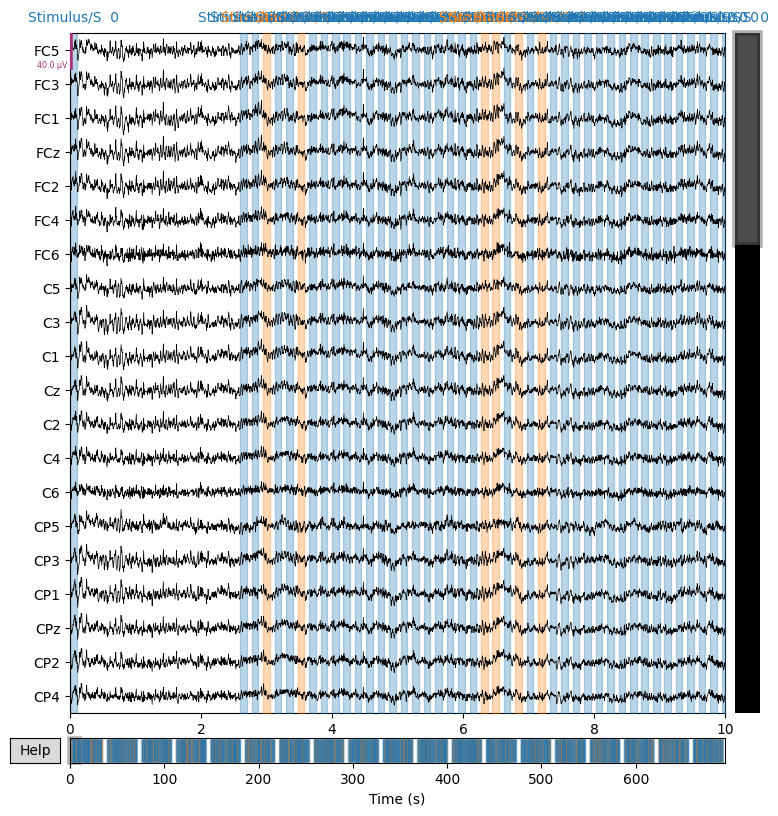

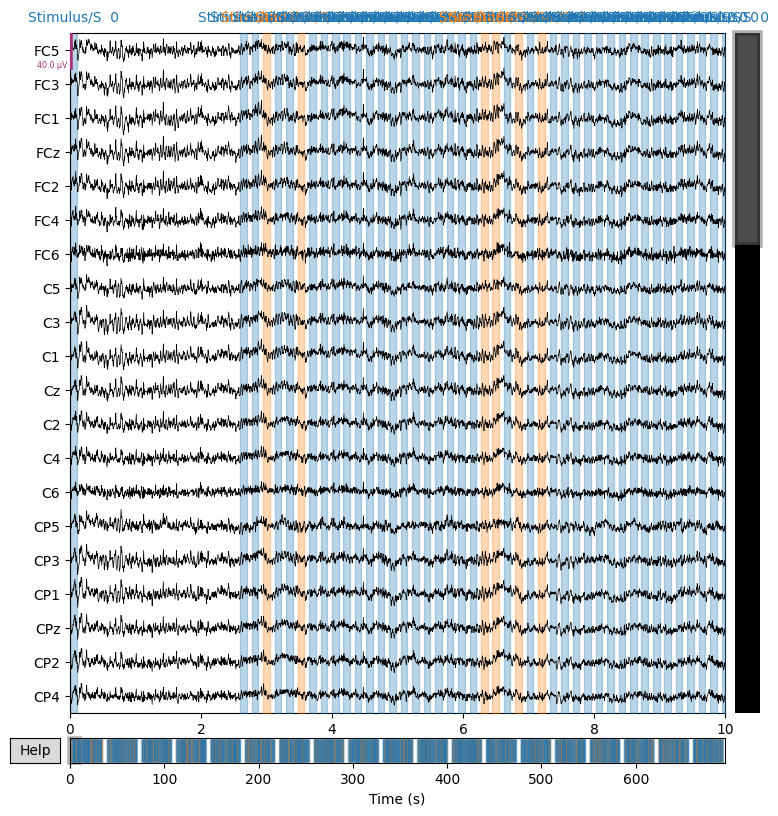

In [ ]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
raw.plot()

Fitting ICA to data using 64 channels (please be patient, this may take a while)


<ipython-input-6-a6df2c6a8959>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw.copy())


Selecting by number: 20 components
Fitting ICA took 23.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components


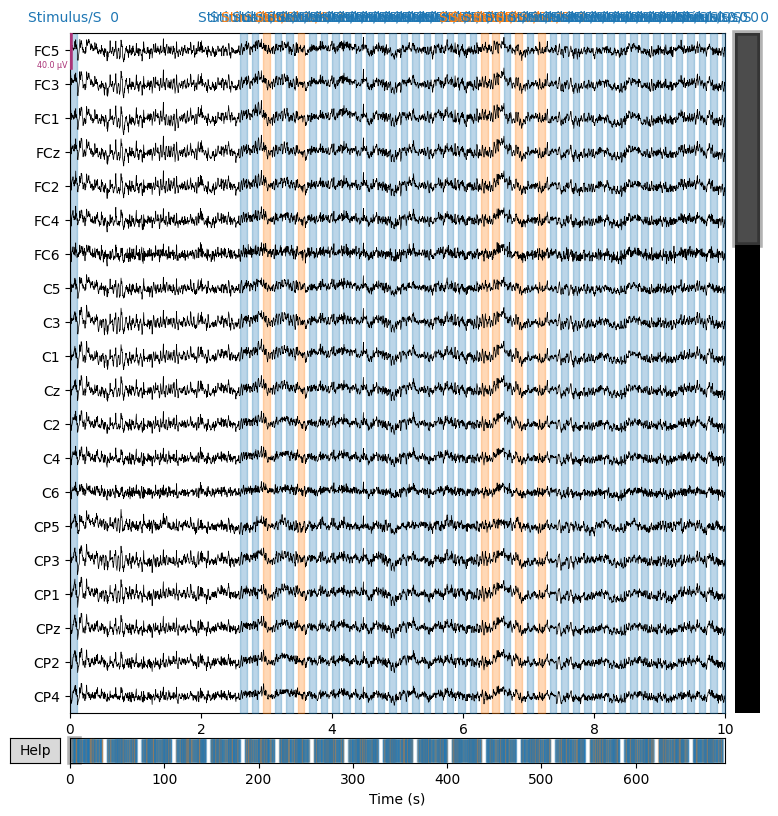

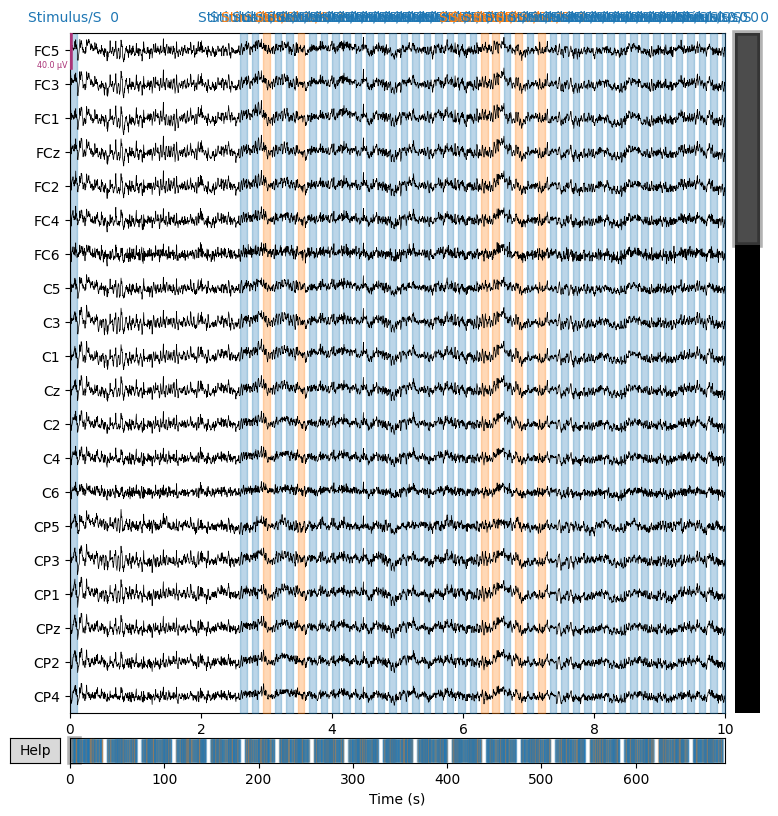

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)
ica.fit(raw.copy())
rawICA = ica.apply(raw.copy())
rawICA.plot()

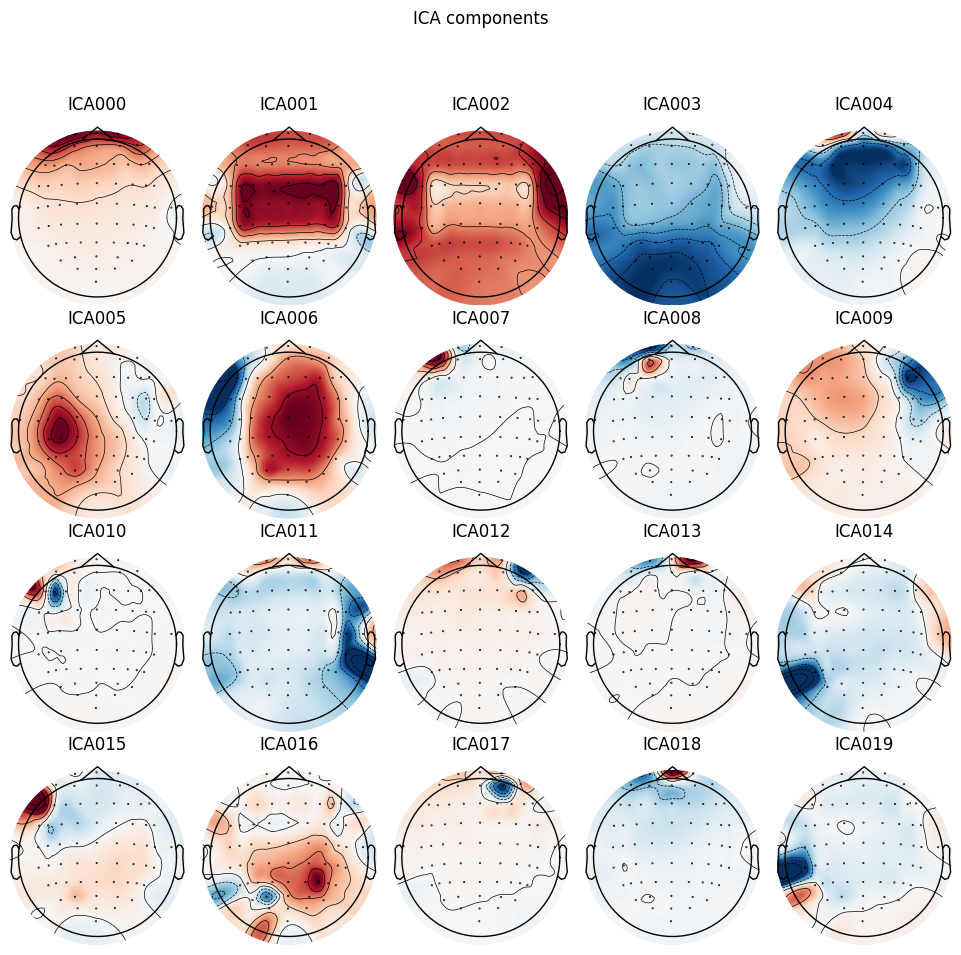

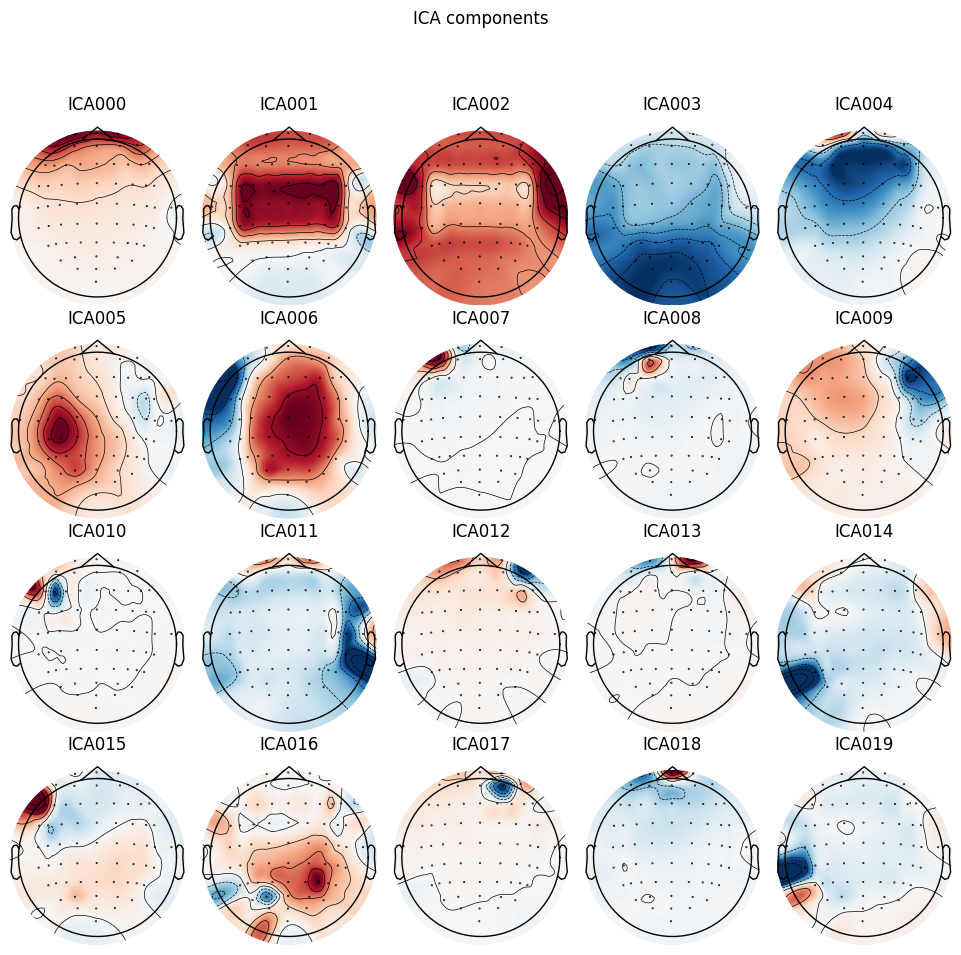

In [ ]:
ica.plot_components(outlines='head')

In [ ]:
print(ica)

<ICA | raw data decomposition, method: fastica (fit in 34 iterations on 166728 samples), 20 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>


In [ ]:
ica.exclude = [0,1,2,5,6,16]

In [ ]:
bad_idx, scores = ica.find_bads_eog(raw,'Fp2', threshold=2)
print(bad_idx)

Using EOG channel: Fp2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2400 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


[0]


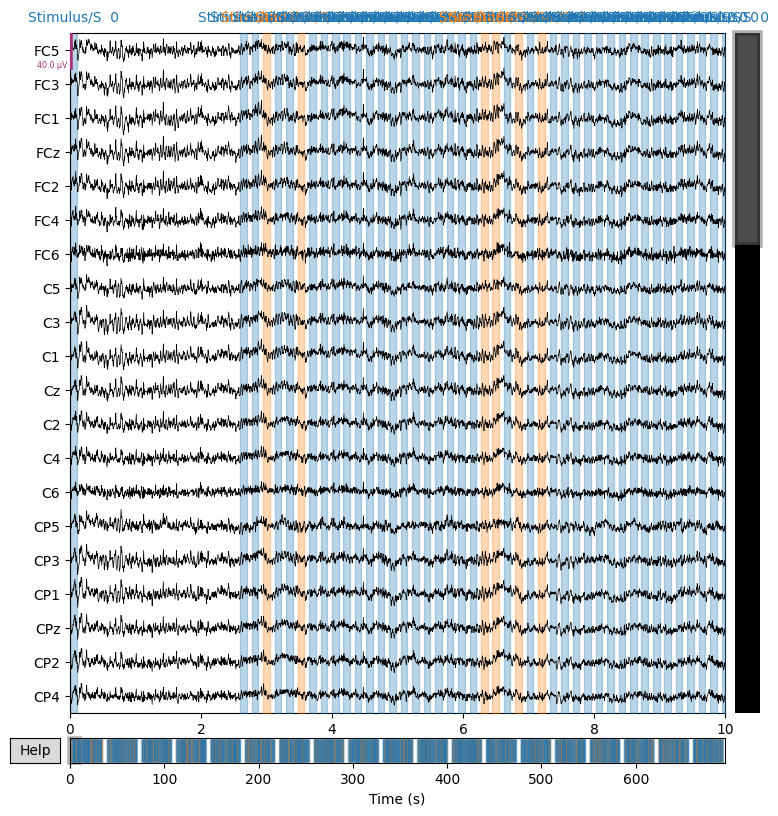

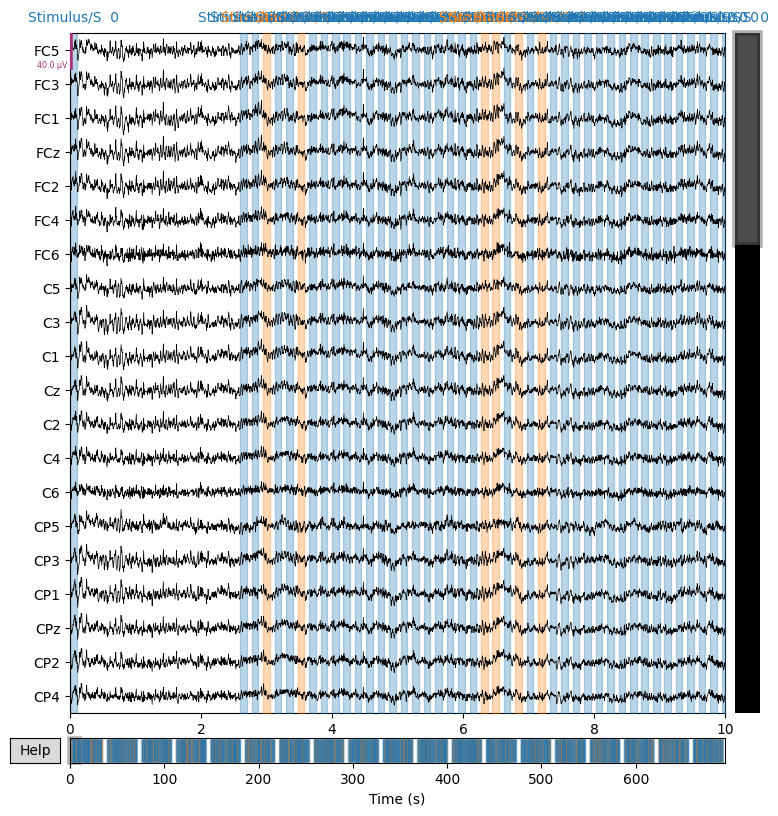

In [ ]:
raw.plot()

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 64 PCA components


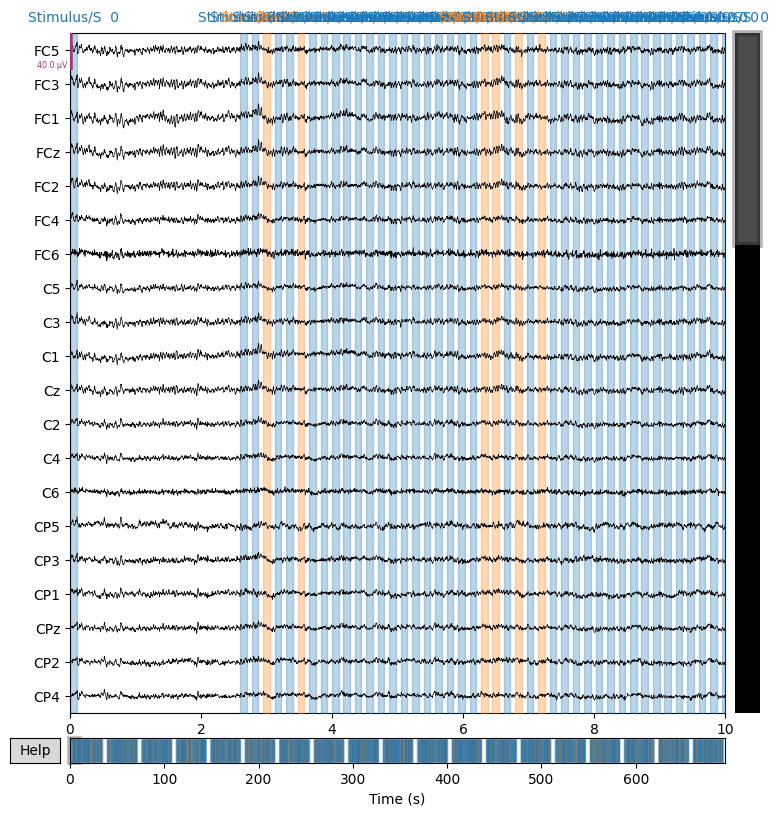

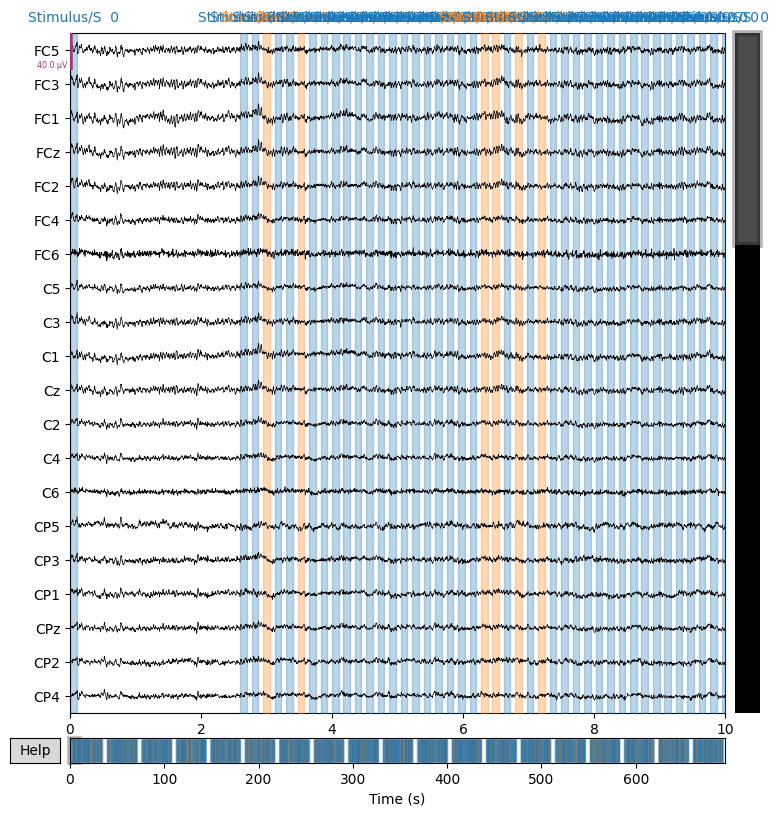

In [ ]:
rawICA = ica.apply(raw.copy(),exclude = ica.exclude)
rawICA.plot()

In [ ]:
plt.rcParams["figure.figsize"]=20,10

## Filtrado de las señales
Para el filtrado de la señal, se utiliza un filtro pasa banda tipo fir con frecuencia de corte inferior en los 0.1Hz y frecuencia superior de corte a los 15Hz

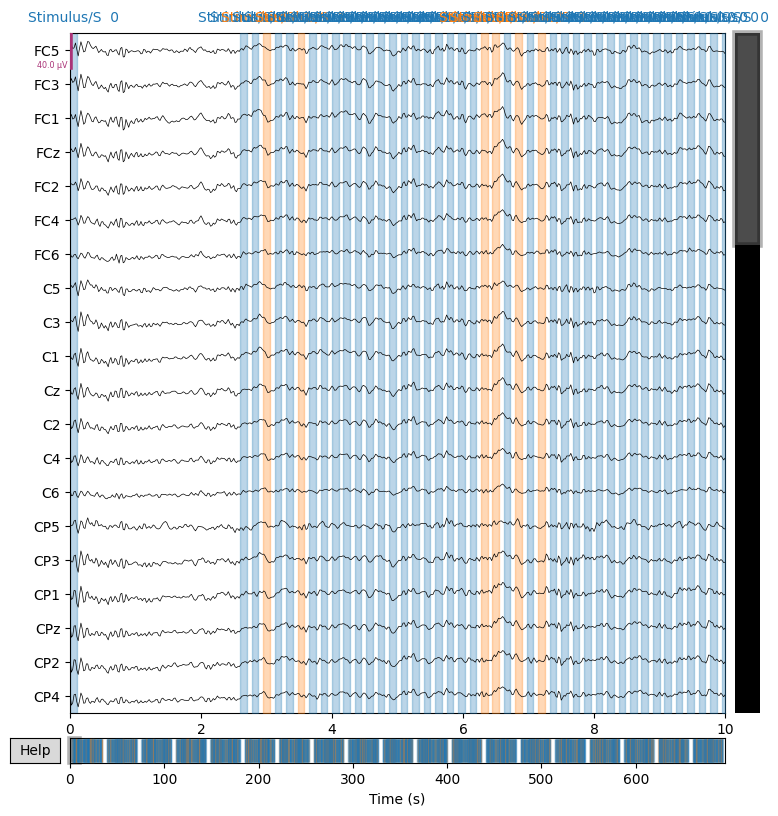

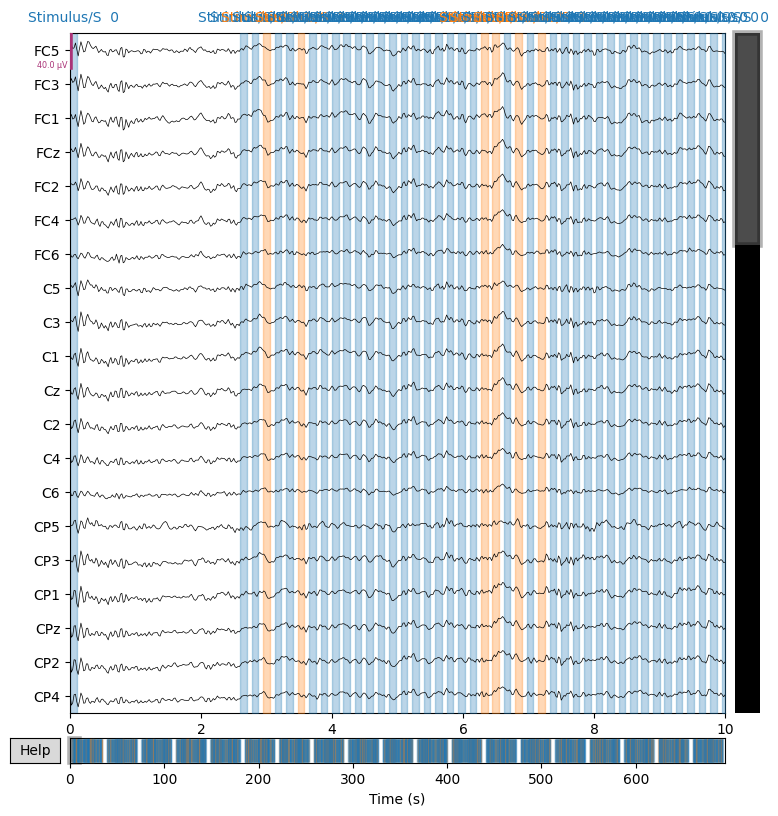

In [ ]:
rawF =  raw.copy().filter(l_freq=0.1, h_freq=15, fir_design='firwin', verbose=False)
picks = ['Fz', 'Cz', 'Pz']
#rawF.pick_channels(picks)
#rawF.crop(tmin=10, tmax=12)
rawF.plot()

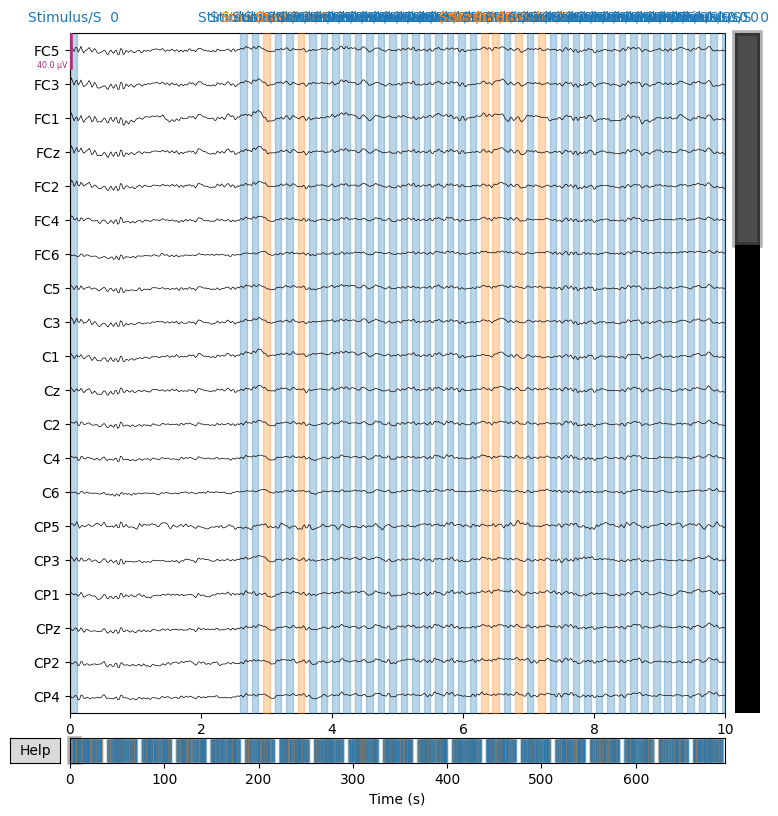

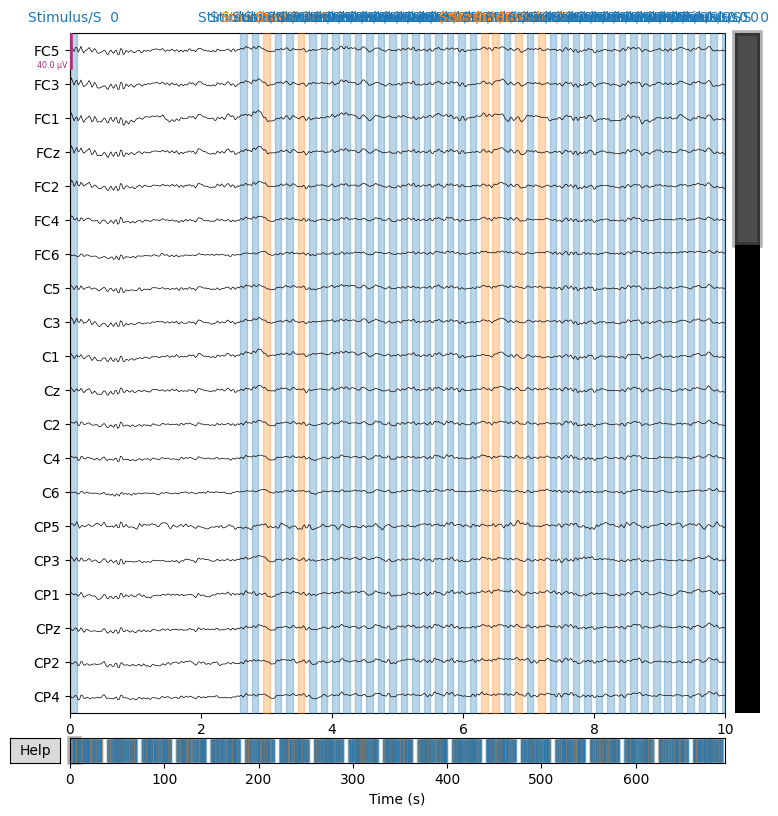

In [ ]:
#lowpass, highpass = 40, 0.1
rawICAF =  rawICA.filter(l_freq=0.1, h_freq=15, fir_design='firwin', verbose=False)
picks = ['Fz', 'Cz', 'Pz']
#rawF.pick_channels(picks)
#rawF.crop(tmin=10, tmax=12)
rawICAF.plot()

## Listar los eventos
Los eventos se cargan y luego se asigna las categorias de los eventos, para este caso el dataset se divide en eventos relacionados al potencial P300 y los que no estan relacionados con este.

In [ ]:
events, _ = mne.events_from_annotations(raw, verbose=False)
event_dict = {"NoP300":0,"P300":1}

## Separar la señal en Epocas
Como la grabación tiene la información de toda la linea de tiempo, esta se divide en diferentes epocas relacionadas a cada evento.
Estas epocas inician a los 300ms antes del evento (tmin) y termina 700ms despues del evento (tmax)

In [ ]:
epochsr = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict, preload=True)
epochs = mne.Epochs(rawICAF, events, tmin=-0.3, tmax=0.7, event_id=event_dict, preload=True)

Not setting metadata
3421 matching events found
Setting baseline interval to [-0.30000000000000004, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3421 events and 241 original time points ...
1 bad epochs dropped
Not setting metadata
3421 matching events found
Setting baseline interval to [-0.30000000000000004, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3421 events and 241 original time points ...
1 bad epochs dropped


In [ ]:
print(epochs.event_id)
print(epochs["P300"])
print(len(epochs["P300"]))
epochs.info

{'NoP300': 0, 'P300': 1}
<Epochs |  570 events (all good), -0.3 – 0.7 s, baseline -0.3 – 0 s, ~67.2 MB, data loaded,
 'P300': 570>
570


<Info | 8 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.1 Hz
 lowpass: 15.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 240.0 Hz
>

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-19-016acfa0afb9>:3: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs['P300'].plot(n_epochs=1)


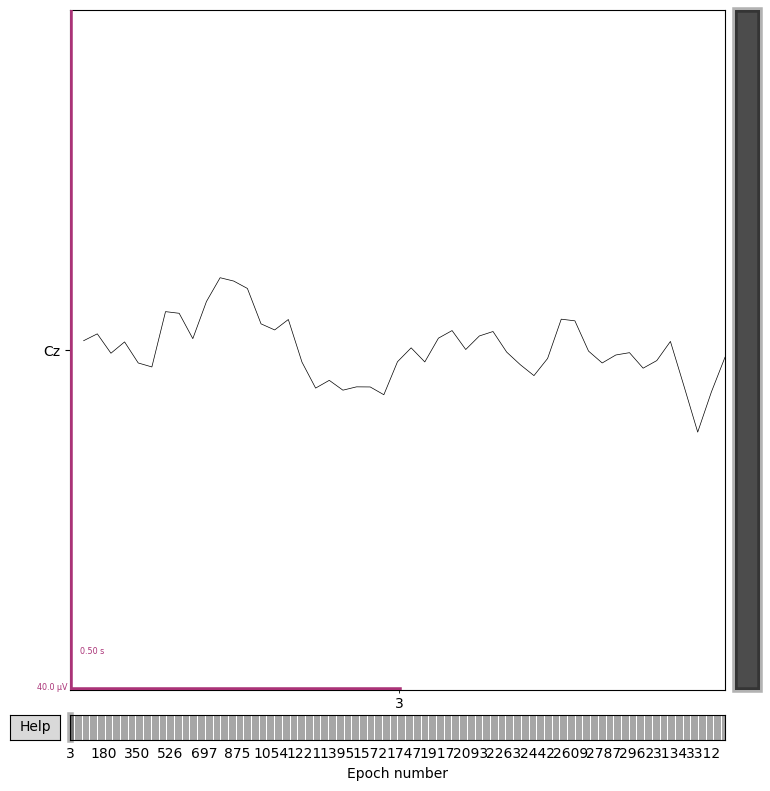

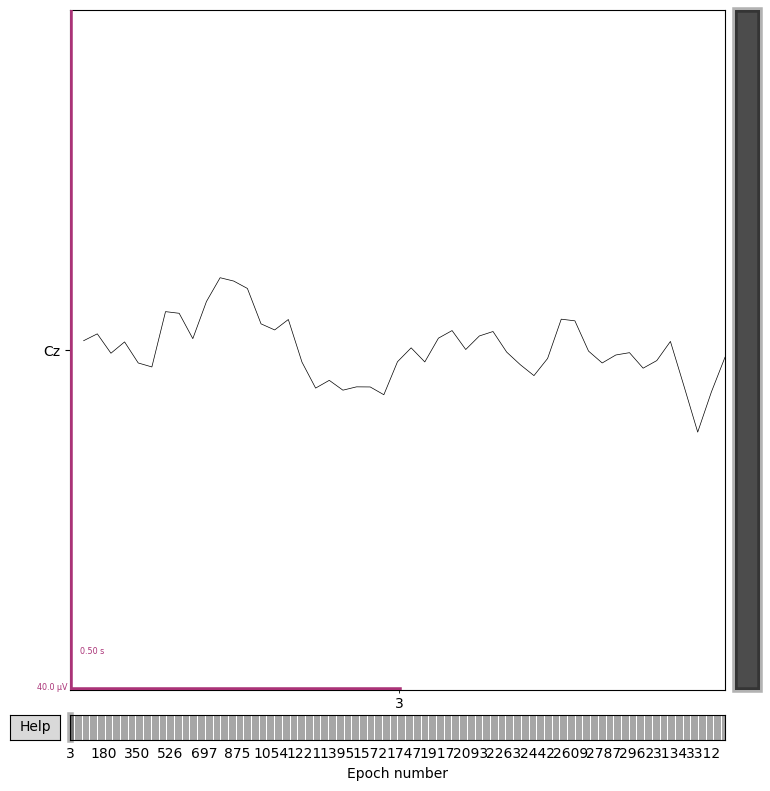

In [ ]:
picks = ['Cz']
epochs.pick_channels(picks)
epochs['P300'].plot(n_epochs=1)

In [ ]:
epochs_equalized = epochs.copy().equalize_event_counts(event_dict)
epochs_equalized

Dropped 2280 epochs: 0, 1, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 47, 52, 53, 54, 55, 56, 57, 58, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 82, 83, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 106, 111, 112, 113, 114, 117, 118, 119, 122, 123, 124, 125, 126, 129, 130, 131, 132, 133, 136, 137, 138, 139, 140, 143, 146, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 180, 181, 182, 183, 184, 187, 188, 191, 192, 193, 194, 195, 196, 197, 198, 203, 204, 205, 210, 211, 212, 213, 214, 215, 218, 219, 220, 221, 222, 225, 226, 227, 228, 229, 230, 231, 232, 235, 236, 239, 240, 241, 242, 243, 244, 245, 246, 247, 250, 253, 254, 255, 256, 257, 258, 263, 264, 265, 266, 267, 268, 269, 274, 275, 276, 277, 278, 279, 282, 283, 284, 285, 286, 291, 292, 295, 296, 297, 298, 299, 300, 301, 302, 305, 308, 309, 310, 311, 312, 313, 314

(<Epochs |  1140 events (all good), -0.3 – 0.7 s, baseline -0.3 – 0 s, ~2.1 MB, data loaded,
  'NoP300': 570
  'P300': 570>,
 array([   0,    1,    4, ..., 3417, 3418, 3419]))

## Guardar el Archivo de epocas
Se guarda el archivo de epocas para hacer más analisis, para visualización o para ingresarlo a ML

In [ ]:
epochsr.save("oddball_train_epo_raw.fif")
epochs.save('/content/drive/MyDrive/BCI/BCICompetition/data/Train_set/oddball_train_epo.fif')

<ipython-input-21-4c944027bb68>:1: RuntimeWarning: This filename (oddball_train_epo_raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochsr.save("oddball_train_epo_raw.fif")


## Sub Sampling

In [ ]:
# Reducir la frecuencia de muestreo a 100 Hz
epochs_resampled = epochs.copy().resample(125)

In [ ]:
n_data1 = epochs[0].get_data()
n_data1[0][0].size

241

In [ ]:
epochs_resampled[0].get_data().size
n_data2 = epochs_resampled[0].get_data()
n_data2[0][0].size

126

In [ ]:
epochs_resampled.save('/content/drive/MyDrive/BCI/BCICompetition/data/Train_set/oddball_subsampl_epo.fif',overwrite=True)